In [1]:
import pandas as pd 
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ir = pd.read_csv(r"C:\Users\admin\AppData\Local\Temp\Temp2_archive.zip\Iris.csv")

In [3]:
ir.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
ir.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
ir.nunique

<bound method DataFrame.nunique of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-s

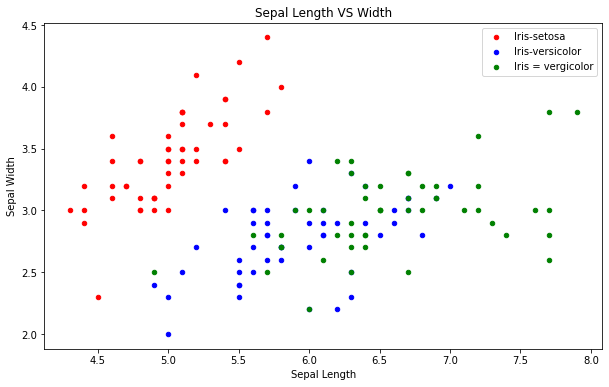

In [12]:
fig = ir[ir.Species == 'Iris-setosa'].plot(kind = 'scatter' ,x = 'SepalLengthCm' , y = 'SepalWidthCm' , color = 'red' , label = 'Iris-setosa')
ir[ir.Species == 'Iris-versicolor'].plot(kind = 'scatter' ,x = 'SepalLengthCm' , y = 'SepalWidthCm' , color = 'blue',ax = fig ,label = 'Iris-versicolor')
ir[ir.Species == 'Iris-virginica'].plot(kind ='scatter' ,x = 'SepalLengthCm' , y = 'SepalWidthCm' , color = 'green' ,ax=fig , label = 'Iris = vergicolor')
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

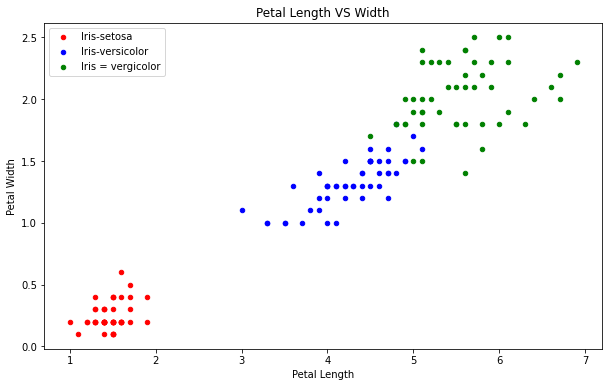

In [13]:
fig = ir[ir.Species == 'Iris-setosa'].plot(kind = 'scatter' ,x = 'PetalLengthCm' , y = 'PetalWidthCm' , color = 'red' , label = 'Iris-setosa')
ir[ir.Species == 'Iris-versicolor'].plot(kind = 'scatter' ,x = 'PetalLengthCm' , y = 'PetalWidthCm' , color = 'blue',ax = fig ,label = 'Iris-versicolor')
ir[ir.Species == 'Iris-virginica'].plot(kind ='scatter' ,x = 'PetalLengthCm' , y = 'PetalWidthCm' , color = 'green' ,ax=fig , label = 'Iris = vergicolor')
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

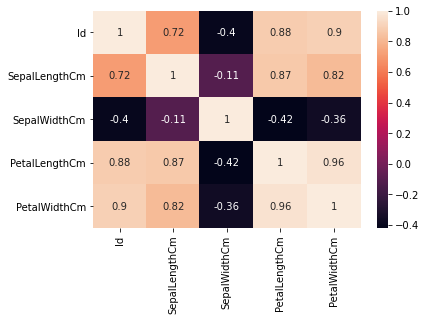

In [21]:
# from the above scatter plots we saw that petal length vs width is the best parameter to classify the iris . 
# now we will try to see this from a heatmap 
sb.heatmap(ir.corr() , annot = True  )
plt.show()

In [27]:
#now as we know that petal length vs width is the best parameter for our classification problem 
#theorfore now we will use naive bayes for our prediction 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
train , test = train_test_split(ir , test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [35]:
train_x =  train[['PetalLengthCm','PetalWidthCm']]
train_y =  train.Species
test_x =  test[['PetalLengthCm','PetalWidthCm']]
test_y =  test.Species

In [36]:
from sklearn import svm # for support vector machines 
from sklearn.linear_model import LogisticRegression # for logistic regressions 
model = svm.SVC()

In [37]:
model.fit(train_x , train_y)

SVC()

In [39]:
from sklearn.metrics import accuracy_score
prediction = model.predict(test_x)
print('the accuracy of the SVM is ',accuracy_score(prediction,test_y))

the accuracy of the SVM is  0.9333333333333333


In [ ]:
#now predicting using sepal length vs width

In [41]:
train_x =  train[['SepalLengthCm','SepalWidthCm']]
train_y =  train.Species
test_x =  test[['SepalLengthCm','SepalWidthCm']]
test_y =  test.Species
model = svm.SVC()
model.fit(train_x , train_y)
prediction = model.predict(test_x)
print('the accuracy of the SVM is ',accuracy_score(prediction,test_y))

the accuracy of the SVM is  0.7777777777777778
